<a href="https://colab.research.google.com/github/KARUNYA-R-P/FACIAL-EMOTION-DETECTION/blob/main/CardioGoodFitness_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cardiogoodfitness:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F375151%2F728976%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240226%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240226T072012Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D715613a58bc23c9aa6d3366b3cae8beb9bf956d2eee273b5a9a809c6cc6f7993ae23ff7400d36b05c1c4da72cd4c2bbf0818e75bc490f63ac4c533bedc1ff5b2774bf74244921016d9be27cfb0406a1d445bea55a385669787e931316c34f73cda3a4f52e30300937524fcc35dead6e0efa33faaeb04618226794457cc7b104cb55cba4fee7a9fb261235837c108731fb943622a95eb12ed7bdc12ee25bb3cd0b028c38ac480437599deb204090804db6f87fbaa7f502113fa193554b50f76b6dc0a81d525ab895066dd244ac6a53ea0832d3c038329c55c44d3d6e5dfeb607ff69272ef5b4f78e39a20356f2ed2d38daa2ab4d407c09be6f9cd3fa2a43a899c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1697 bytes downloaded
Downloaded and uncompressed: cardiogoodfitness
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiogoodfitness/CardioGoodFitness.csv


/kaggle/input/cardiogoodfitness/CardioGoodFitness.csv

# CardioGood Fitness Project

The mission of determining the usual consumer profile for each treadmill product offered by CardioGood Fitness falls to the AdRight market research team. The market research team makes the decision to look into potential variances in client attributes between the different product lines. The group makes the decision to gather information on anyone who bought a treadmill from a CardioGoodFitness retail location in the previous three months. The CardioGoodFitness.csv file contains the data. The group decides to research the following customer variables: TM195, TM498 or TM798 product purchased; gender; age in years; education in years; status in relationships, single or coupled; average number of times the client plans to use the treadmill each week; and self-rated fitness on a scale of 1 to 5, where 1 is the average number of kilometers the consumer plans to walk or run each week; annual household income ($); poor shape and five is good shape. Create a consumer profile for each CardioGood Fitness treadmill product line using descriptive analytics.



## Open csv file

In [3]:
#import libaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#open file
df = pd.read_csv('../input/cardiogoodfitness/CardioGoodFitness.csv')

In [5]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


## Checking data

In [6]:
#checking for duplicates
df.duplicated().sum()

0

In [7]:
#checking null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
#checking NaN values
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [10]:
# Mean Age is 28.8 years old. Range is between 18 - 50 years old.
# Mean Education is 15.6 years. Range is between 12 - 21 years.
# Mean Usage is 3.5 times per week. Range is between 2 - 7 times per week.
# Mean fitness is 3.3. Range is between 1- 5.
# Mean income is 53'720 $. Range is between 29'562 $ - 104'581 $.
# Mean miles is 103.2. Range is between 21 - 360 miles.

<ipython-input-11-38f430ffe90a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True,linewidths=.5)


<Axes: >

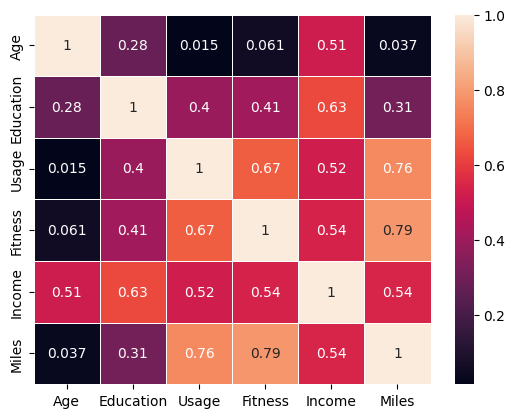

In [11]:
sns.heatmap(data=df.corr(), annot=True,linewidths=.5)

In [12]:
# Only positive correlations between the features
# There is a 0.76 correlation between planned weekly usage and planned miles run
# There is a 0.79 correlation between a fitness level and planned miles run
# No other strong correlations between the features

## Exploratory Data Analysis

### General exploration

<Axes: xlabel='Product', ylabel='Count'>

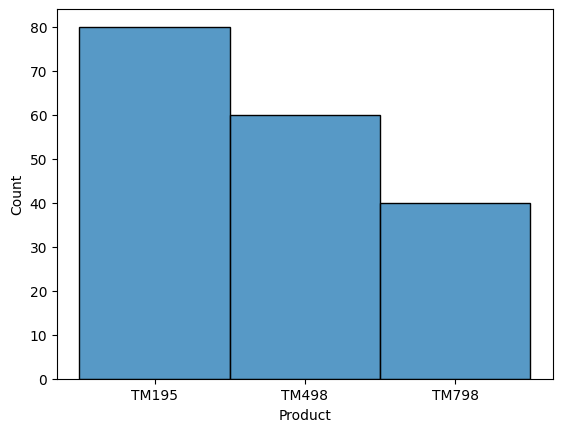

In [13]:
sns.histplot(df,x="Product")

In [14]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

Axes(0.125,0.11;0.775x0.77)


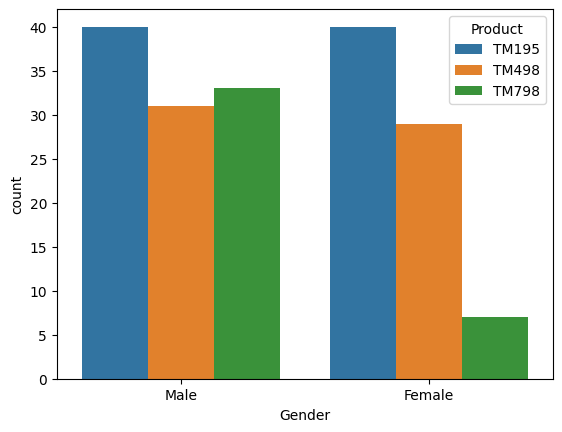

Axes(0.125,0.11;0.775x0.77)


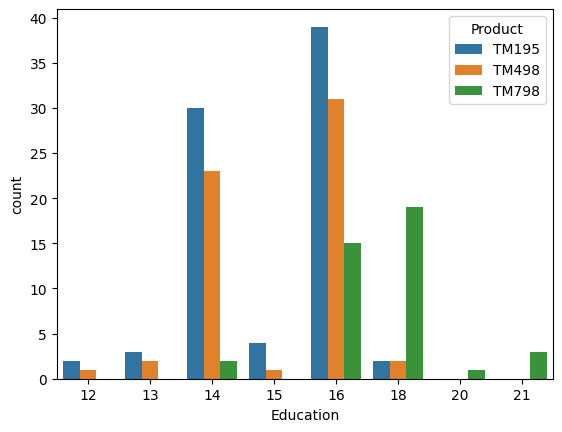

Axes(0.125,0.11;0.775x0.77)


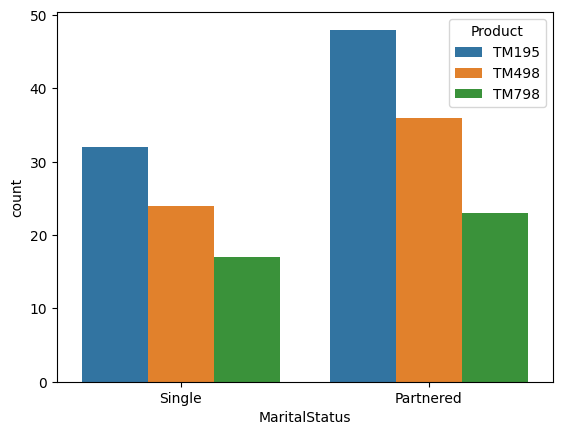

Axes(0.125,0.11;0.775x0.77)


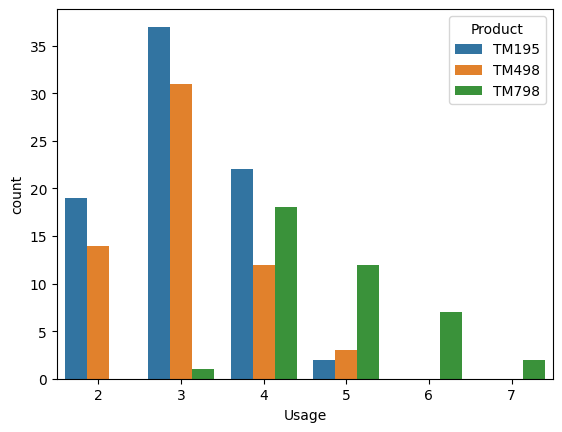

In [15]:
cat_cols = [col for col in df.columns if str(df[col].dtype) in ["int64",'category', 'object', 'bool']]
for col in cat_cols[2:6]:
    print(sns.countplot(data=df, x=col, hue='Product'))
    plt.show()

In [ ]:
#Most customers own TM195 during the prior 3 months

<Axes: xlabel='Age', ylabel='Count'>

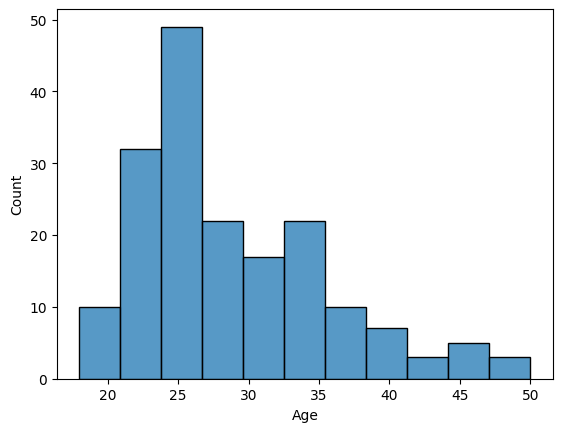

In [16]:
sns.histplot(df,x="Age")

In [ ]:
# Most customers who own a treadmil are 25 years old. Most customers are between the age of 20 - 35.

<Axes: xlabel='Gender', ylabel='Count'>

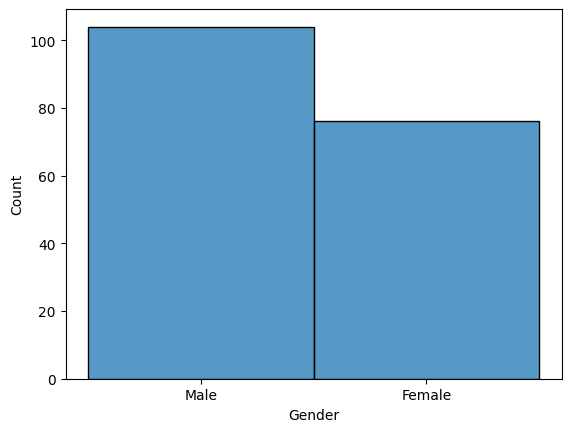

In [17]:
sns.histplot(df,x="Gender")

In [18]:
# Most customers are male.

<Axes: xlabel='Education', ylabel='Count'>

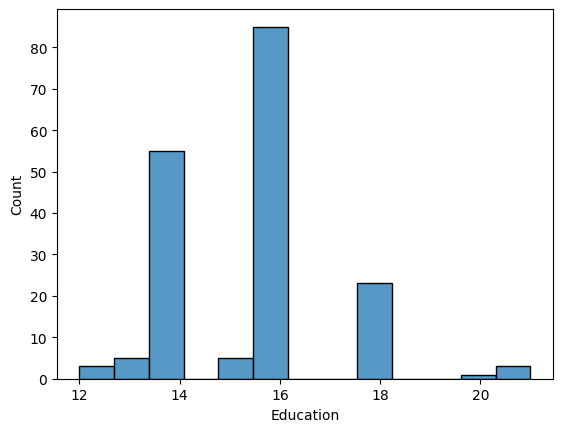

In [19]:
sns.histplot(df,x="Education")

In [20]:
# Most customers have 16 years of education. Followed by 14 years

<Axes: xlabel='MaritalStatus', ylabel='Count'>

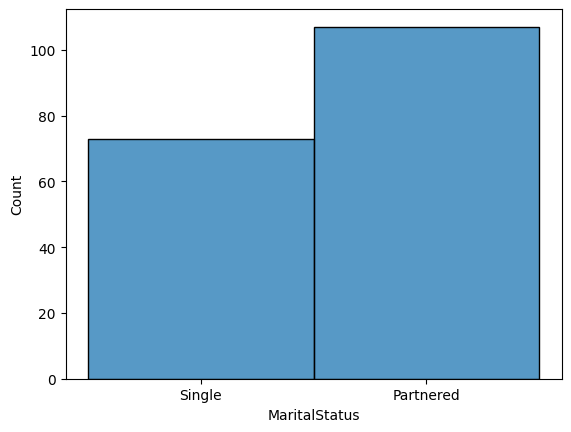

In [21]:
sns.histplot(df, x="MaritalStatus")

In [22]:
# Most customers are Partnered

<Axes: xlabel='Usage', ylabel='Count'>

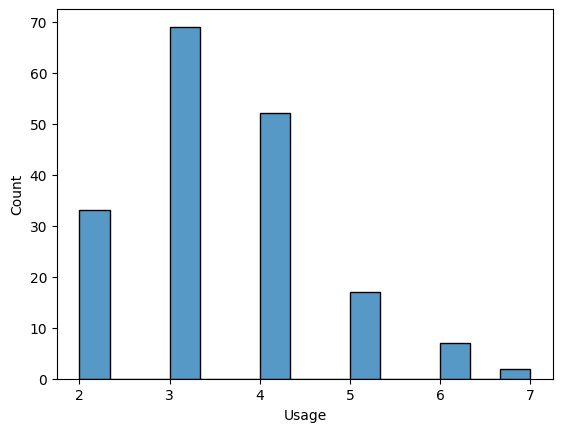

In [23]:
sns.histplot(df,x="Usage")

In [24]:
# Most customers plan to use the treadmill 3 times a week. After that, the number drops of.
# None of the customers plan to use the treadmill 0 or only 1 time per week

<Axes: xlabel='Fitness', ylabel='Count'>

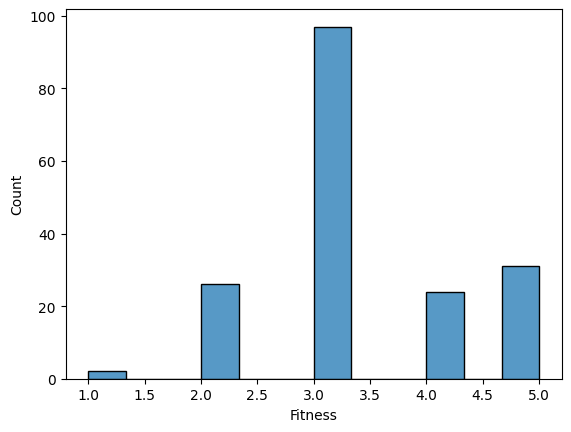

In [25]:
sns.histplot(df,x="Fitness")

In [26]:
# Most customers rated themsevles a 3 out of 5 in terms of fitness.
# Most customers therefore consider themselves to have an average fitness

<Axes: xlabel='Income', ylabel='Count'>

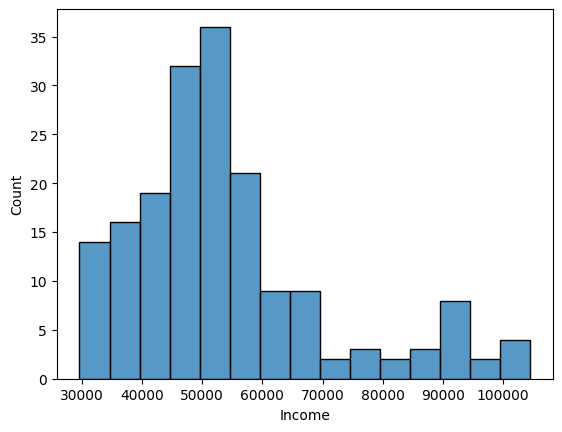

In [27]:
sns.histplot(df,x="Income")

In [28]:
df["Income"].median()

50596.5

In [29]:
# Distribution is right skewed. Therefore most customers have a salary closer to the lower end of the spectrum.
# Median income is 50597 $

<Axes: xlabel='Miles', ylabel='Count'>

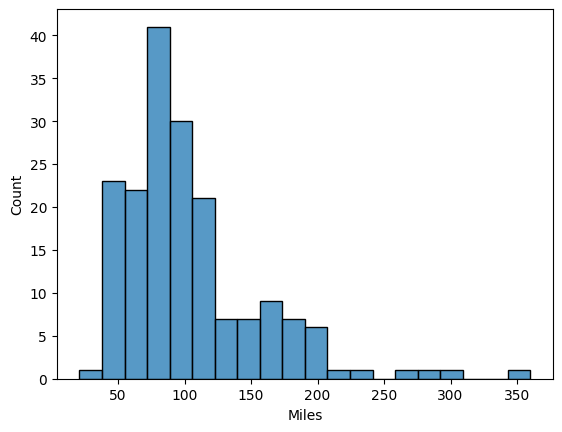

In [30]:
sns.histplot(df,x="Miles")

In [31]:
df["Miles"].median()

94.0

In [32]:
# Distribution is right skewed. Therefore most customers expect to run closer to the lower end of the specturm.
# The median is 94.0 miles

### Studying customer characteristics

<Axes: xlabel='Product', ylabel='Age'>

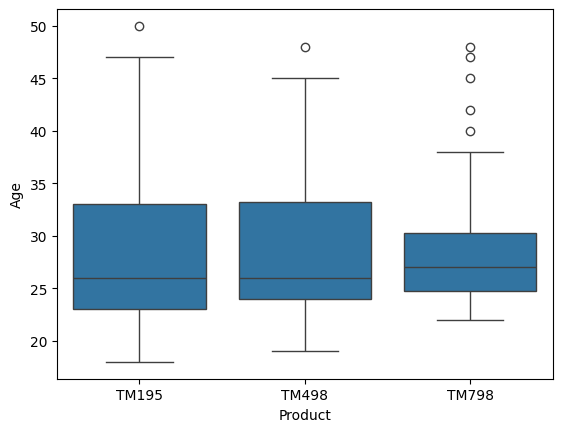

In [33]:
#Does age affect which treadmill they buy?

sns.boxplot(data=df,x="Product",y="Age")

In [34]:
# Similiar age demographics purchase the TM195 and TM498
# TM798 is purchased by mostly by customers under 40. But there are a few outliers
# There are a few outliers will all treadmill's especially the TM798

Axes(0.125,0.11;0.775x0.77)


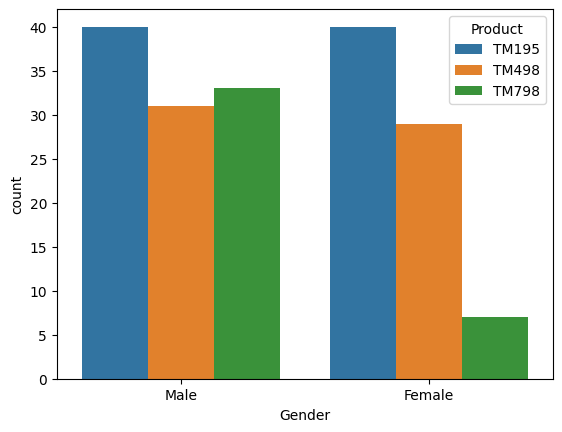

Axes(0.125,0.11;0.775x0.77)


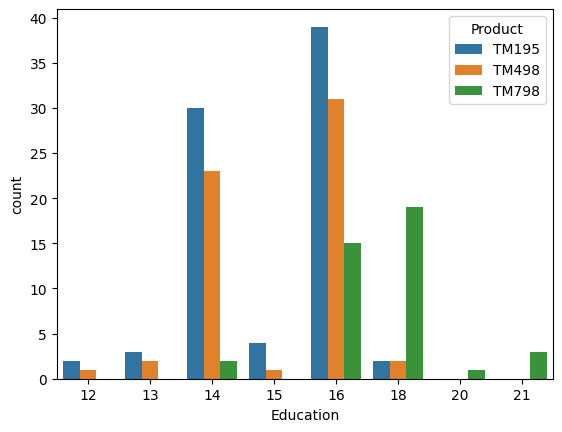

Axes(0.125,0.11;0.775x0.77)


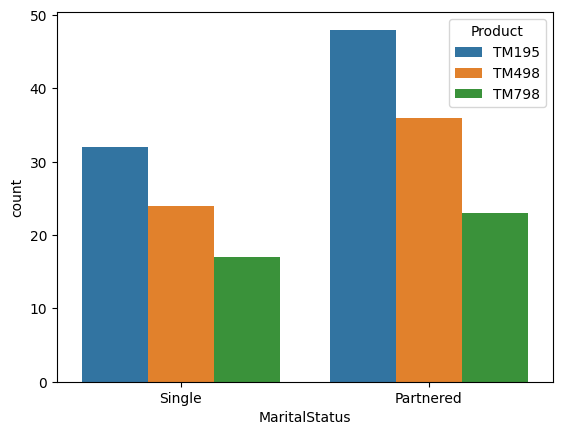

Axes(0.125,0.11;0.775x0.77)


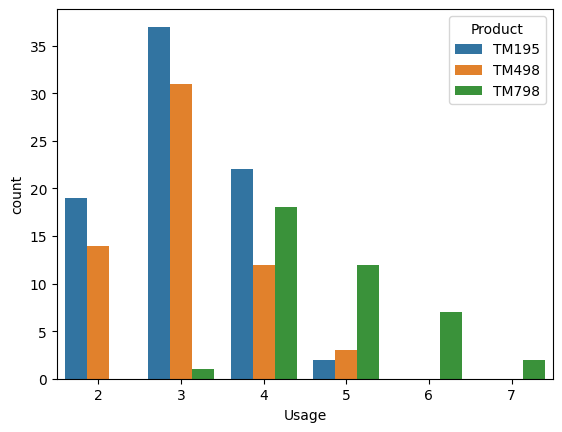

In [35]:
cat_cols = [col for col in df.columns if str(df[col].dtype) in ["int64",'category', 'object', 'bool']]
for col in cat_cols[2:6]:
    print(sns.countplot(data=df, x=col, hue='Product'))
    plt.show()

<Axes: xlabel='Product', ylabel='count'>

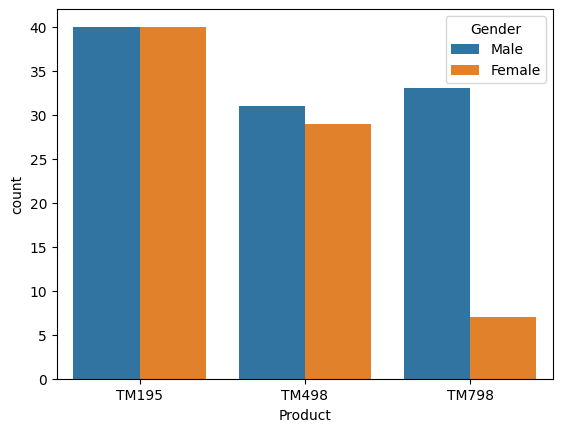

In [36]:
#Does gender affect which treadmill they buy?

sns.countplot(data=df,x="Product",hue="Gender")

In [37]:
# Gender does not play a role in the purchase of TM195 and TM498.
# However, males are most likely to purchase a TM798

In [38]:
# People with similiar education will buy the TM195 or the TM498
# People with more education experience are more likely to purchase the TM798

In [41]:
# Partnered customers are most likely to purchase any of the 3 products.
# MartialStatus does not seem to play a role in what customers purchase

In [39]:
# Most customers who purchase the TM498 plan to run 3 times a week. With a few outliers
# Customers who purchase the TM798 plan to run more compared to the TM195 & TM498 customers.
    # 4-5 times a week versus 3-4 times a week

<Axes: xlabel='Product', ylabel='Fitness'>

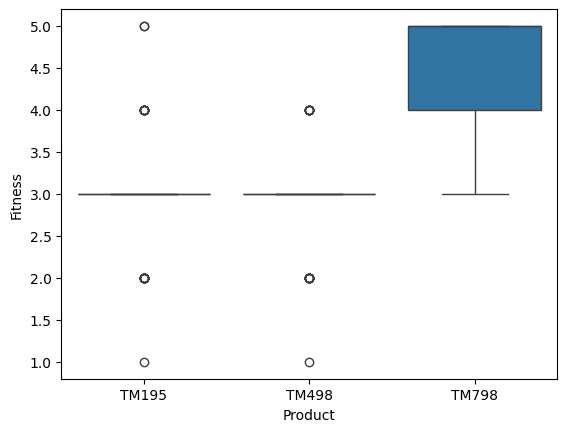

In [40]:
#Does Fitness affect which treadmill they buy?

sns.boxplot(data=df,x="Product",y="Fitness")

In [42]:
# Customer characteristics stand out for TM798. Customers who ranked themselves as more fit were more likely to purchase the TM798
# There are a few outliers for TM195 & and TM498 but in general, customers who scored themselves a 3 bought one of these treadmills

<Axes: xlabel='Product', ylabel='Income'>

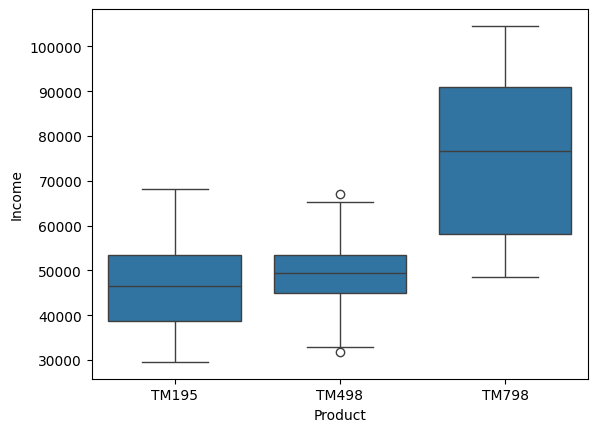

In [43]:
#Does income affect which treadmill they buy?

sns.boxplot(data=df,x="Product",y="Income")

In [44]:
# Customer characteristics stand out for TM798. Customers with a higher income were more likely to purchased a TM798
# Customers with a lower income were more likely to purchase a TM195 or TM498

<Axes: xlabel='Product', ylabel='Miles'>

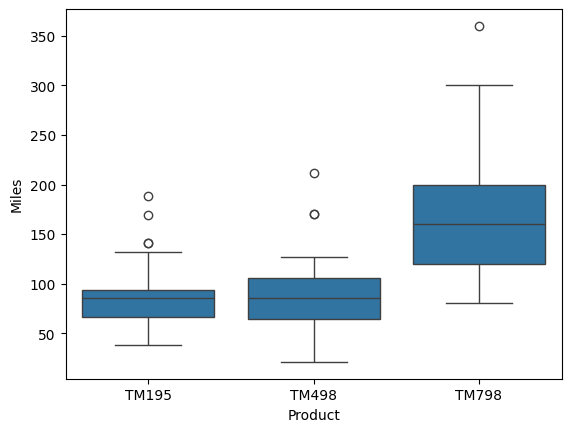

In [45]:
#Does miles affect which treadmill they buy?

sns.boxplot(data=df,x="Product",y="Miles")

In [46]:
# Customer characteristics stand out for TM798. Customers who plan to run more miles were more likely to purchased a TM798
# Customers who plan to run less than a 100 miles were more likely to purchase a TM195 or TM498

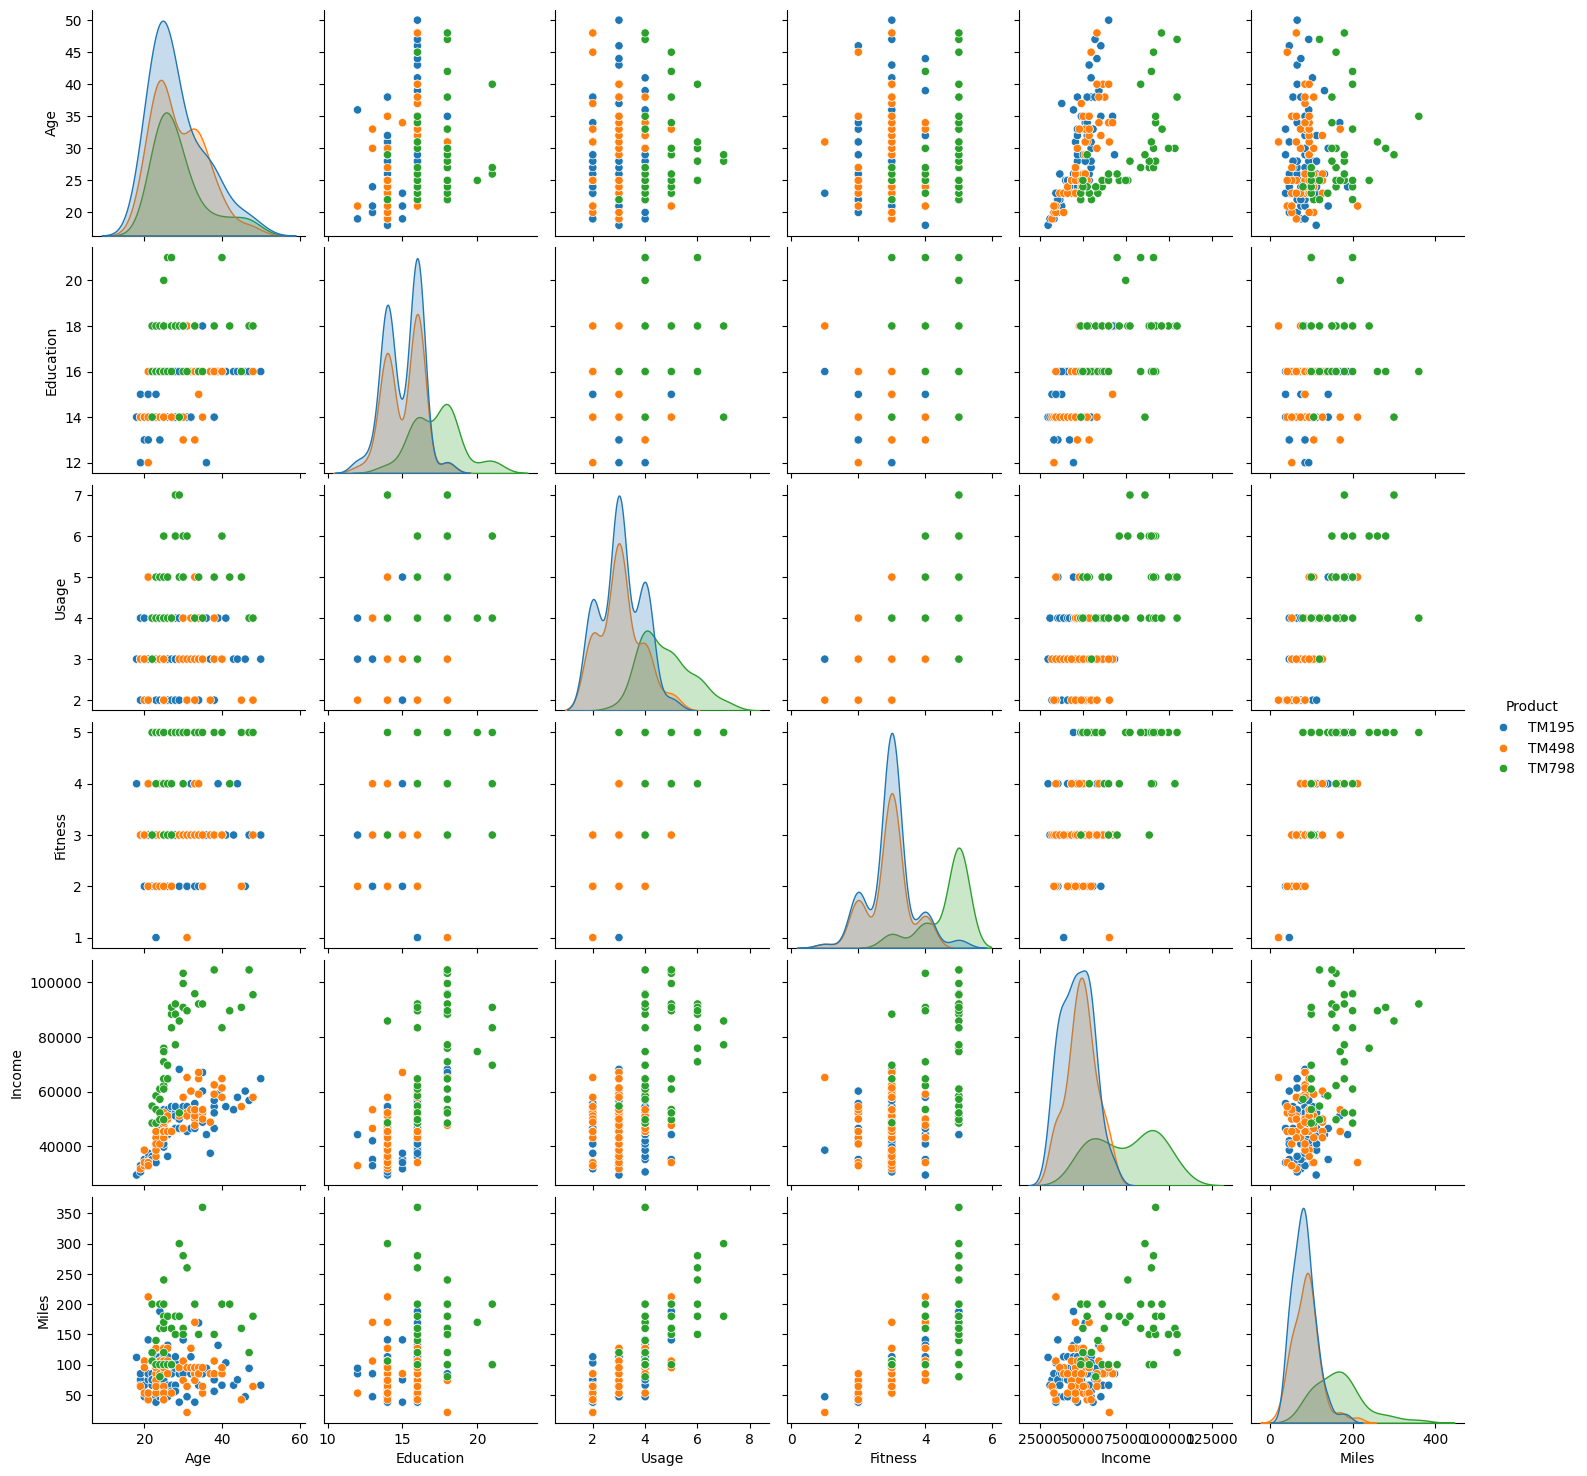

In [47]:
# Comparing Customer Characteristics per Treadmill using Pairplot

sns.pairplot(data=df,hue="Product")

In [48]:
# Customers characteristics for TM798 differ compared to TM195 & TM498
# TM798 customers are:
    # have spent more time in education
    # plan to use the treadmill more
    # consider themselves more fit
    # have a higher income
    # plan to run more miles
# Patterns in customer characteristics for TM195 & TM498 are almost the same

## Final Observations

- TM195 is the most popular purchase
    * Customer characteristics for TM195 are very similar to TM498. Except TM195 favours customers with slightly lower incomes.

- Customers characteristics for TM798 differ compared to TM195 & TM498
    * TM798 seems to favour customers with a higher fitness level and a higher income level.
    * TM798 targets not only a different clientele but a more nich-clientele.